In [1]:
# Title:     SmartHome Dataset
# Authors:   Aline J
# Date:      01/06/2020
# Goal:      Analyze and predict energy use efficiency 
#            in a smarthouse during a year under variable weather conditions.
# Questions: 
# 1) What are the variables that influence energy efficiency? 
# 2) When is 
### Begins Here ####
# 1. Import dependencies
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade


Requirement already up-to-date: sklearn in c:\programdata\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import string as string
import warnings
warnings.filterwarnings('ignore')
#from learntools.core import binder
#binder.bind(globals())
#from learntools.data_viz_to_coder.ex7 import *
#print("Setup Complete")

In [4]:
# 2. Import Raw data file into a data frame
csv_path = "Data/HomeC.csv"
my_data = pd.read_csv(csv_path,   parse_dates=True)
home_dat = my_data.select_dtypes(exclude=['object'])
nRow, nCol = my_data.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 503911 rows and 32 columns


In [5]:
home_dat.head(5)
home_dat.tail(5)

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
503906,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
503907,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
503908,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
503909,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
503910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#time_index = pd.date_range('2016-01-01 05:00', periods=503911,  freq='min')
time_index = pd.date_range('2016-01-01 05:00', periods=503911,  freq='min')
time_index = pd.DatetimeIndex(time_index)
home_dat = home_dat.set_index(time_index)
# Check that a dataset has been uploaded into my_data

In [7]:
home_dat = home_dat[0:-1] ## == dataset[0:dataset.shape[0]-1] == dataset[0:len(dataset)-1] == dataset[:-1]
home_dat.tail(10)

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
2016-12-16 03:20:00,1.522583,0.003200,1.522583,0.000067,0.023033,0.627233,0.041767,0.005283,0.008433,0.013533,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:21:00,1.537383,0.003183,1.537383,0.000133,0.021683,0.642733,0.042033,0.005283,0.008333,0.013517,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:22:00,1.551817,0.003200,1.551817,0.000050,0.056200,0.624783,0.041750,0.005250,0.008450,0.013483,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:23:00,1.599617,0.003217,1.599617,0.000067,0.089217,0.638650,0.041750,0.005617,0.008467,0.013450,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:24:00,1.608867,0.003217,1.608867,0.000033,0.114300,0.623283,0.041817,0.005217,0.008350,0.013433,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:25:00,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:26:00,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:27:00,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:28:00,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:29:00,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51


In [8]:
home_dat = home_dat.dropna(axis='columns', how='all')

In [9]:
home_dat.tail(10)

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
2016-12-16 03:20:00,1.522583,0.003200,1.522583,0.000067,0.023033,0.627233,0.041767,0.005283,0.008433,0.013533,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:21:00,1.537383,0.003183,1.537383,0.000133,0.021683,0.642733,0.042033,0.005283,0.008333,0.013517,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:22:00,1.551817,0.003200,1.551817,0.000050,0.056200,0.624783,0.041750,0.005250,0.008450,0.013483,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:23:00,1.599617,0.003217,1.599617,0.000067,0.089217,0.638650,0.041750,0.005617,0.008467,0.013450,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:24:00,1.608867,0.003217,1.608867,0.000033,0.114300,0.623283,0.041817,0.005217,0.008350,0.013433,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:25:00,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:26:00,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:27:00,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:28:00,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:29:00,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51


In [10]:
home_dat.columns = [col.replace(' [kW]', '') for col in home_dat.columns]
home_dat.columns

Index(['use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1', 'Furnace 2',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12',
       'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room',
       'Solar', 'temperature', 'humidity', 'visibility', 'apparentTemperature',
       'pressure', 'windSpeed', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability'],
      dtype='object')

In [11]:
home_dat['Furnace'] = home_dat[['Furnace 1','Furnace 2']].sum(axis=1)
home_dat['Kitchen'] = home_dat[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)

#df['Result'] = df['Column A']/df['Column B']
home_dat.columns
#home_dat.head(5)
#home_dat.tail(5)

Index(['use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1', 'Furnace 2',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12',
       'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room',
       'Solar', 'temperature', 'humidity', 'visibility', 'apparentTemperature',
       'pressure', 'windSpeed', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability', 'Furnace', 'Kitchen'],
      dtype='object')

In [14]:
home_dat['EneEffi'] = home_dat['use']-home_dat['gen']

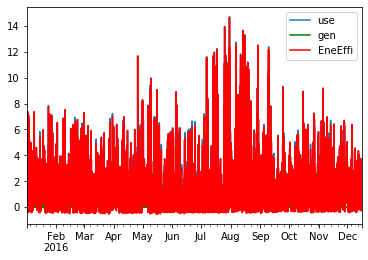

In [15]:
ax = plt.gca()
home_dat.plot(kind='line',y='use',ax=ax)
home_dat.plot(kind='line',y='gen', color='green', ax=ax)
home_dat.plot(kind='line',y='EneEffi', color='red', ax=ax)

plt.show()

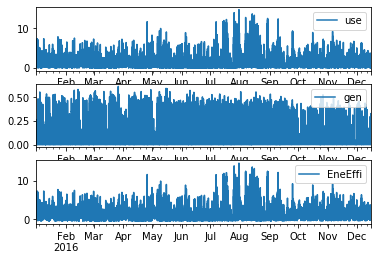

In [25]:
plt.figure(1)
plt.subplot(311)
ax = plt.gca()
home_dat.plot(kind='line',y='use',ax=ax)

plt.subplot(312)
ax = plt.gca()
home_dat.plot(kind='line',y='gen',ax=ax)
plt.subplot(313)
ax = plt.gca()
home_dat.plot(kind='line',y='EneEffi',ax=ax)

In [16]:
# Data Preparation
home_dat.columns
home_dat.dtypes 
home_dat.tail()




,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,...,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen,EneEffi
2016-12-16 03:25:00,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,...,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51,0.727683,0.000633,1.598050
2016-12-16 03:26:00,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,...,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51,0.729050,0.000600,1.596100
2016-12-16 03:27:00,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,...,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51,1.060117,0.000600,1.921050
2016-12-16 03:28:00,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,...,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51,1.116033,0.000650,1.974983
2016-12-16 03:29:00,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,...,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51,1.128833,0.000650,1.987717


In [17]:
data = home_dat.filter(items=[ 'Solar', 'gen', 'use', 'House overall', 'Dishwasher',
                               'Furnace', 'Home office', 'Fridge',
                               'Wine cellar', 'Garage door', 'Kitchen',
                               'Barn', 'Well', 'Microwave', 'Living room', 'temperature', 'humidity', 
                               'visibility', 'apparentTemperature',
                               'pressure', 'windSpeed', 'windBearing', 'precipIntensity', 'dewPoint',
                               'precipProbability'])

In [18]:
# Running RF with all the data to investigate the driving variables of energy efficiency at a 1min resolution
# Data Preparation
data.head()
#my_data.dtypes 
features=data
type(features)
#features.iloc[:,5:].head(5)
#features.head(5)
#features.info()
features.columns

Index(['Solar', 'gen', 'use', 'House overall', 'Dishwasher', 'Furnace',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen',
       'Barn', 'Well', 'Microwave', 'Living room', 'temperature', 'humidity',
       'visibility', 'apparentTemperature', 'pressure', 'windSpeed',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [ ]:
plt.figure();
features.plot();

In [19]:
# Labels are the values we want to predict
labels = np.array(features['gen'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('gen', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [20]:
# Training and Testing Sets
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 10)

In [21]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (377932, 24)
Training Labels Shape: (377932,)
Testing Features Shape: (125978, 24)
Testing Labels Shape: (125978,)


In [ ]:
feature_list.index

In [22]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 10 decision trees
#rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
rf = RandomForestRegressor(n_estimators = 10, random_state = 10)
# Train the model on training data
rf.fit(train_features, train_labels);

In [23]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#Mean Absolute Error: 8512.05 degrees

Mean Absolute Error: 0.0 degrees.


In [24]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#Accuracy: 95.96 %.
    # That looks pretty good! Our model has learned how to predict the List price as a function of list and close price in Houston with 95.96% accuracy.

Accuracy: -inf %.


In [ ]:
energy_data = my_data.filter(items=[ 'EneEffi', 'use', 'gen', 'House overall', 'Dishwasher',
                                     'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen',
                                     'Barn', 'Well ', 'Microwave', 'Living room'])
energy_data.head(10)


In [ ]:
weather_data = my_data.filter(items=['Solar', 'temperature', 'humidity', 'visibility',
                               'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
                               'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'])
#weather_data.head()
weather_data.tail()

In [ ]:
plt.figure();
weather_data.plot();

In [ ]:
plt.figure();
energy_data.plot();

In [ ]:
# Generate Data per (day) and (month) 
energy_per_day = energy_data.resample('D').sum()
energy_per_day.head()

weather_per_day = weather_data.resample('D').sum()
weather_per_day.head()




In [ ]:
plt.figure(figsize=(40,10))
#energy_per_day.plot();
weather_per_day.plot();

In [ ]:
weather_per_month = weather_data.resample('M').sum() # for energy we use sum to calculate overall consumption in period 
weather_per_month.head()

In [ ]:
plt.figure(figsize=(40,10))
#energy_per_day.plot();
weather_per_month.plot();

In [ ]:
energy_per_month = energy_data.resample('M').sum() # for energy we use sum to calculate overall consumption in period 
energy_per_month.head()

In [ ]:
ax = plt.gca()
energy_per_month.plot(kind='line',y='use',ax=ax)
energy_per_month.plot(kind='line',y='gen', color='blue', ax=ax)
energy_per_month.plot(kind='line',y='EneEffi', color='red', ax=ax)

plt.show()

In [ ]:
plt.figure(figsize=(40,10))
energy_per_month.plot();

In [ ]:
rooms_energy = energy_per_month.filter(items=[      # remove the devices consumption 
                                     'Home office',
                                     'Wine cellar', 'Kitchen',
                                     'Barn','Living room']) 
devices_energy = energy_per_month.filter(items=[ 'Dishwasher',
                                     'Furnace', 'Garage door', 'kitchen','Microwave'])
energy_efficiency =energy_per_month.filter(items=[ 'EneEffi', 'use', 'gen'])

all_rooms_consum = rooms_energy.sum()
all_devices_consum = devices_energy.sum()
all_energy_effi = energy_efficiency.sum()
print(all_rooms_consum)
print(all_devices_consum)
print(all_energy_effi)

In [ ]:
plot = all_rooms_consum .plot(kind = "pie", figsize = (5,5))
plot.set_title("Consumption for room")

In [ ]:
plot = all_devices_consum .plot(kind = "pie", figsize = (5,5))
plot.set_title("Consumption for devices")

In [ ]:
plot = all_energy_effi.plot(kind = "bar", figsize = (5,5))
plot.set_title("energy efficiency")

In [ ]:
# What are the variables that regulate power generation?